# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [51]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

# Data

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction

< y >
* **Price** : The price of the used car in INR Lakhs.



< X >
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [52]:
# Load Data
data = pd.read_csv("assignment2_data.csv")
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### EDA 

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


In [33]:
# 요약 통계량 확인
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [34]:
# 결측치 확인
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

➡️ 전체 데이터 개수 대비 New_Price 결측치가 많아서 컬럼 제거

In [53]:
# 컬럼 제거
data = data.drop(['New_Price'], axis = 1)
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [127]:
len(data)

6019

### 1. `Location`
- location 에 따른 Price는 크게 변하지 않는다

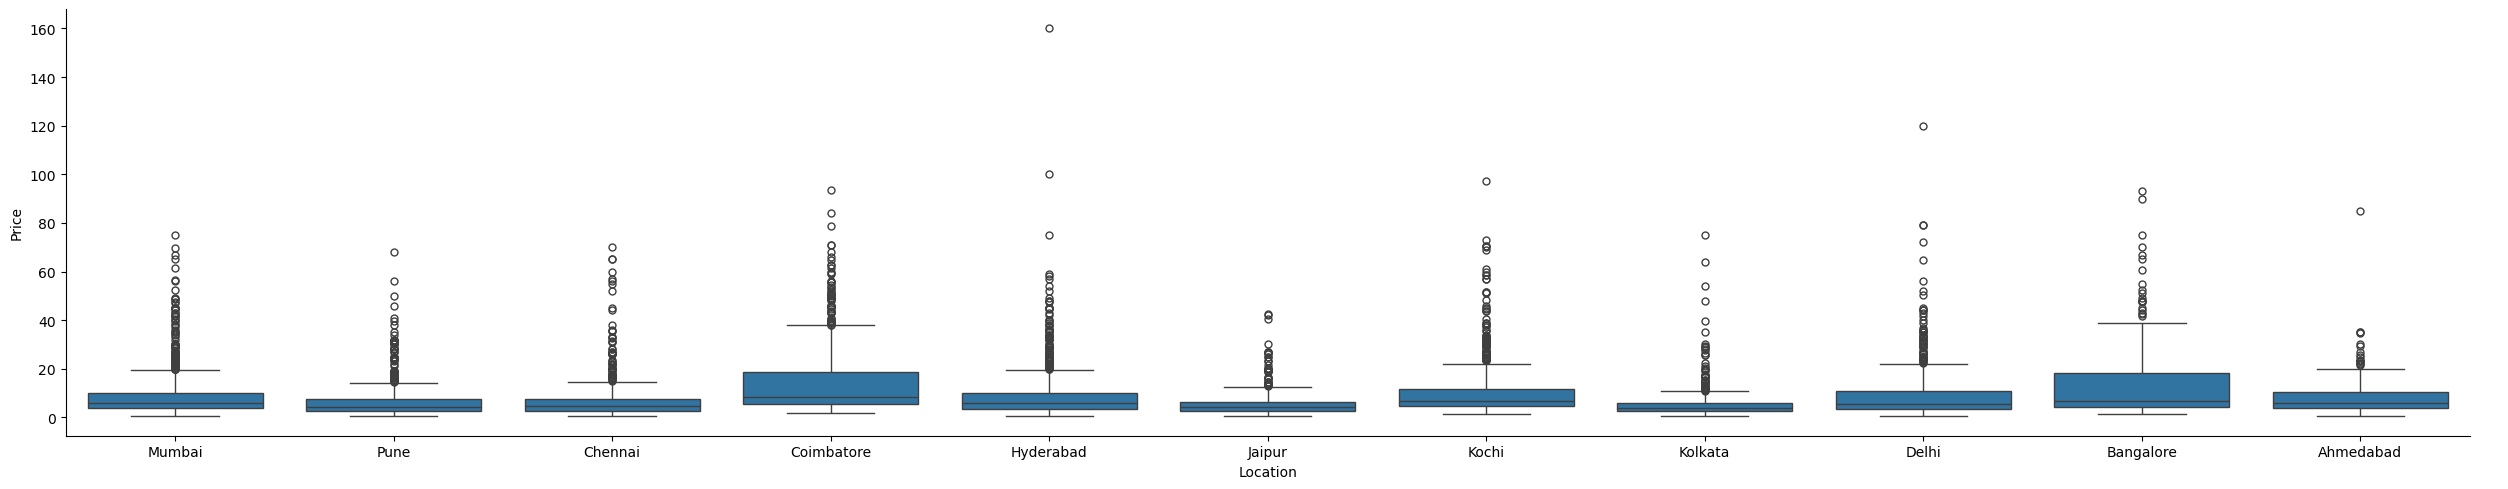

In [131]:
sns.catplot(x='Location', y='Price', kind = 'box',data=data, aspect = 5)
plt.show()

### 2. `Year`
- 구매이력이 짧을수록 평균 중고 가격이 높아진다

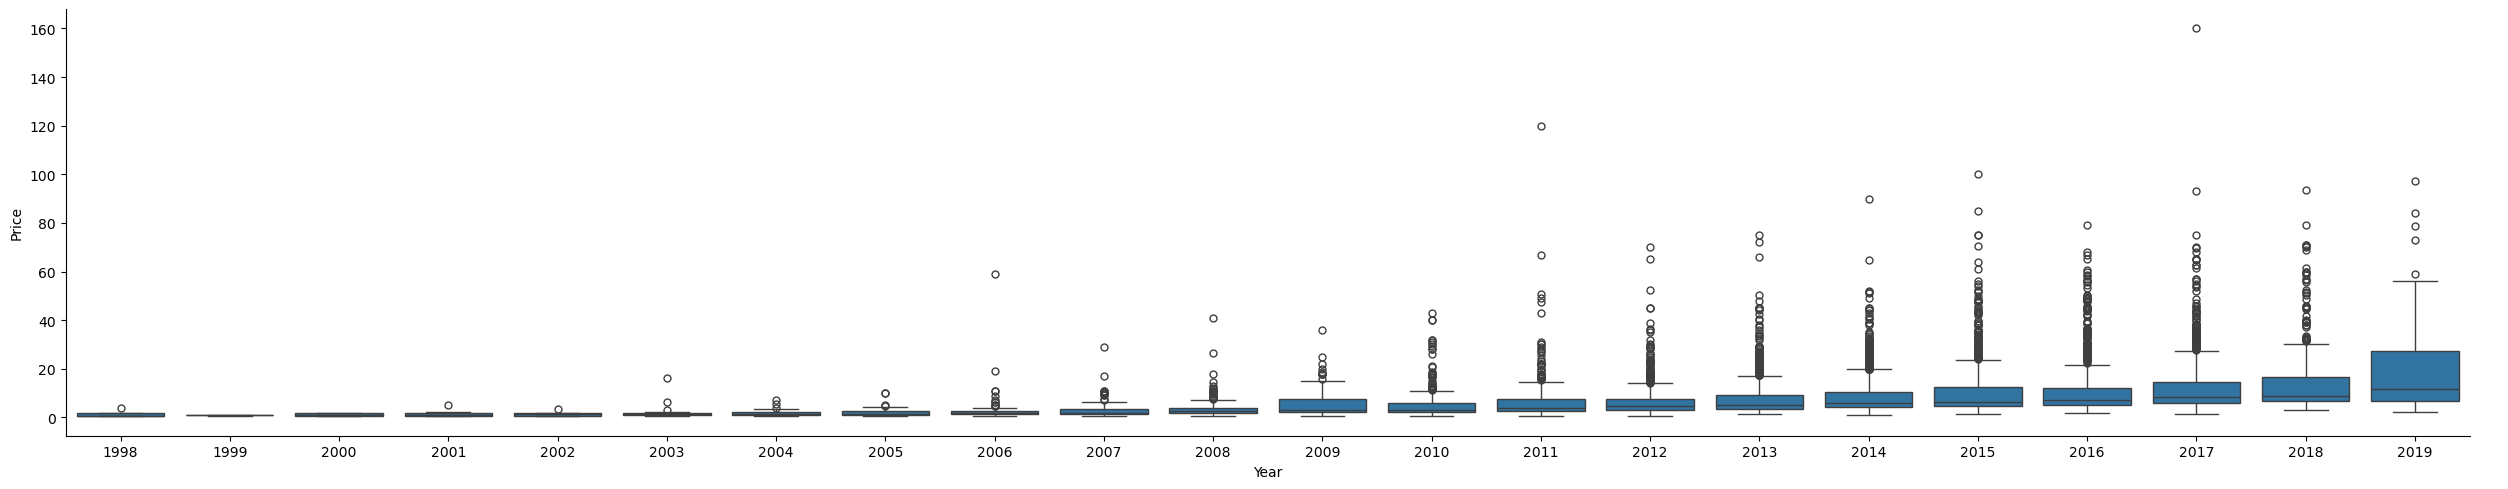

In [132]:
sns.catplot(x='Year', y='Price', kind = 'box',data=data, aspect = 5)
plt.show()

In [151]:
data.groupby('Year')['Price'].mean().sort_values()

Year
1999     0.835000
2000     1.175000
2002     1.294000
1998     1.432500
2001     1.543750
2004     1.941290
2005     2.026842
2003     2.440000
2007     3.204000
2006     3.355897
2008     3.917759
2009     5.177727
2010     5.515497
2011     6.831931
2012     7.324724
2013     8.699353
2014     9.639360
2015    11.215538
2016    11.719096
2017    13.764940
2018    15.726141
2019    19.464118
Name: Price, dtype: float64

### 3. `Owner_Type`
- 소유자 변경 횟수가 적을수록 중고 가격이 높다
- **수치형 변수로 변환** (Fourth & Above는 4회로 변경)

In [138]:
data.groupby('Owner_Type')['Price'].mean()

Owner_Type
First             9.962445
Fourth & Above    3.280000
Second            7.599886
Third             5.007257
Name: Price, dtype: float64

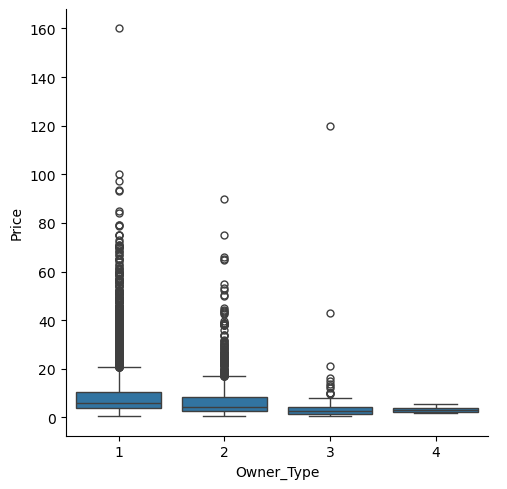

In [154]:
sns.catplot(x='Owner_Type', y='Price', data=data, kind='box')
plt.show()

In [55]:
data.loc[data['Owner_Type']=='First', 'Owner_Type'] = 1
data.loc[data['Owner_Type']=='Second', 'Owner_Type'] = 2
data.loc[data['Owner_Type']=='Third', 'Owner_Type'] = 3
data.loc[data['Owner_Type']=='Fourth & Above', 'Owner_Type'] = 4

data['Owner_Type'] = data['Owner_Type'].astype(float)

### 4. `Seats`
- 2인 좌석인 중고차의 가격이 높다

In [148]:
data.groupby('Seats')['Price'].mean()

Seats
0.0     18.000000
2.0     55.211875
4.0     20.752525
5.0      8.478791
6.0      9.511290
7.0     14.837463
8.0      7.458881
9.0      4.450000
10.0     4.280000
Name: Price, dtype: float64

In [37]:
# 중복 확인
data[data.duplicated()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price


In [5]:
# 컬럼별 unique value 개수 확인
for col in data.columns :
    print(f"{col} : {data[col].nunique()}")

Name : 1876
Location : 11
Year : 22
Kilometers_Driven : 3093
Fuel_Type : 5
Transmission : 2
Owner_Type : 4
Mileage : 442
Engine : 146
Power : 372
Seats : 9
Price : 1373


In [39]:
# 범주형 변수 데이터 값 
cat_cols = data.select_dtypes(include=['category', 'object']).columns.tolist()
for col in cat_cols :
    if len(data[col].unique()) < 50 :
        print(f"{col} : {data[col].unique()}")

Location : ['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
Fuel_Type : ['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
Transmission : ['Manual' 'Automatic']
Owner_Type : ['First' 'Second' 'Fourth & Above' 'Third']


### 전처리

#### 1. 결측치 처리

1) Mileage 결측치

In [40]:
# Mileage 결측치
data[data['Mileage'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,12.75


In [56]:
MileageNunique = pd.DataFrame(data.groupby('Name')['Mileage'].nunique())
MileageNunique.loc['Toyota Prius 2009-2016 Z4']

Mileage    0
Name: Toyota Prius 2009-2016 Z4, dtype: int64

In [57]:
MileageNunique.loc['Mahindra E Verito D4']

Mileage    0
Name: Mahindra E Verito D4, dtype: int64

In [58]:
data = data[~data['Mileage'].isna()]

- 표준마일리지이므로, 대체로 차종에 따라 표준화가 되어 있을 것이라 간주 

→ MileageNunique 데이터프레임에서 각 차종이 가지는 표준 마일리지 값의 개수 확인
(만약 1인 경우, 그 값으로 대체할 수 있음)

➡️두 결측치 모두 차종에 대한 정보가 존재하지 않으므로 제거


2) Engine, Power, Seats 결측치

- `Engine`, `Power`, `Seats` 열 3개가 모두 결측치인 데이터가 다수 존재하여 이에 대한 데이터는 일괄적으로 제거한 뒤 나머지 결측치 처리

In [59]:
# Engine, Power, Seats 열 3개가 모두 결측치인 데이터 제거
data = data.dropna(subset=['Engine', 'Power', 'Seats'], how='all')

In [60]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

3) Seats 결측치

In [11]:
data[data['Seats'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,1,0.0 kmpl,1498 CC,99 bhp,NaN,3.60
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,2,13.0 kmpl,1493 CC,100 bhp,NaN,1.70
2369,Maruti Estilo LXI,Chennai,2008,56000,Petrol,Manual,2,19.5 kmpl,1061 CC,null bhp,NaN,1.50
3800,Ford Endeavour Hurricane LE,Mumbai,2012,129000,Diesel,Automatic,1,12.8 kmpl,2953 CC,null bhp,NaN,7.00
3882,Maruti Estilo LXI,Kolkata,2010,40000,Petrol,Manual,2,19.5 kmpl,1061 CC,null bhp,NaN,2.50
5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,2,19.5 kmpl,1061 CC,null bhp,NaN,1.75


In [61]:
nan_seats = data[data['Seats'].isna()]['Name'].unique().tolist()

In [62]:
SeatsNunique = pd.DataFrame(data.groupby('Name')['Seats'].nunique(dropna=True))
for name in nan_seats :
    print(f'number of unique value for {name} :', int(SeatsNunique.loc[name]))

number of unique value for Ford Figo Diesel : 0
number of unique value for Honda City 1.5 EXI : 1
number of unique value for Maruti Estilo LXI : 0
number of unique value for Ford Endeavour Hurricane LE : 0


In [63]:
# number of unique value == 1 : 대체
null_seats_rows = (data['Name'] == 'Honda City 1.5 GXI') & data['Seats'].isna()
data.loc[null_seats_rows, 'Seats'] = 5

# number of unique value == 0 : 제거
data = data[~data['Seats'].isna()]

#### 2. 단위 제거 

1) Engine 컬럼

In [64]:
data['Engine'] = data['Engine'].str.replace(' CC', '').astype(float)

2) Mileage 컬럼

In [16]:
print(data['Mileage'].str.contains(' km/kg').sum())
print(data['Mileage'].str.contains(' kmpl').sum())

66
5909


- convert km/kg to kmpl 

https://www.kaggle.com/code/rushikeshhiray/converting-km-kg-to-kmpl

In [65]:
Correct_Mileage= []
for i in data.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Correct_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        #print(i)
        Correct_Mileage.append(float(i))
        
data['Mileage']=Correct_Mileage

3) power 컬럼

In [66]:
# null bhp의 값을 가지는 데이터는 모두 nan 값으로 간주하여 제거
data = data[data['Power'] != 'null bhp']

# bhp 단위 제거
data['Power'] = data['Power'].str.replace(' bhp', '').astype(float)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5872 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5872 non-null   object 
 1   Location           5872 non-null   object 
 2   Year               5872 non-null   int64  
 3   Kilometers_Driven  5872 non-null   int64  
 4   Fuel_Type          5872 non-null   object 
 5   Transmission       5872 non-null   object 
 6   Owner_Type         5872 non-null   object 
 7   Mileage            5872 non-null   float64
 8   Engine             5872 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5872 non-null   float64
 11  Price              5872 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 596.4+ KB


#### 이상치 

In [19]:
def categorical_frequency (col) :
    print(f"<{col}>")
    print(df[col].value_counts())
    
def numeric_iqr (df, col) :
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = (df[col] < lower_bound) | (df[col] > upper_bound)

    return outliers.sum()

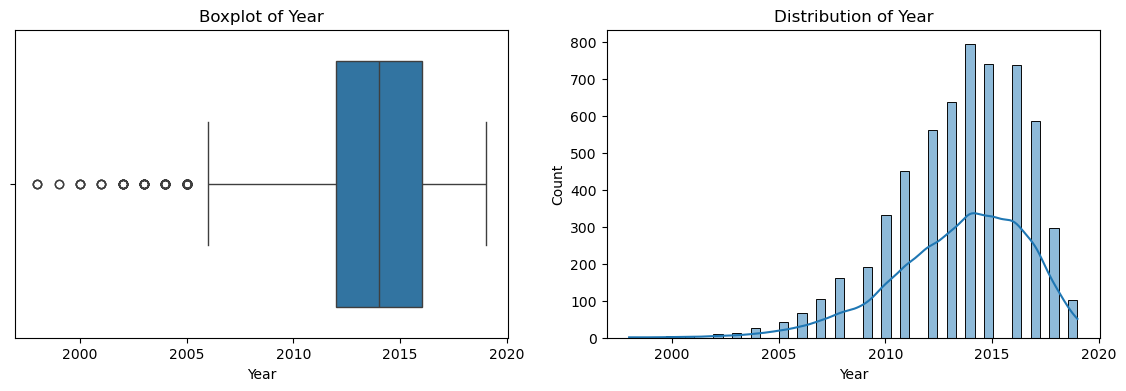

Num of outliers : 105
% of outliers : 1.7881471389645778 %


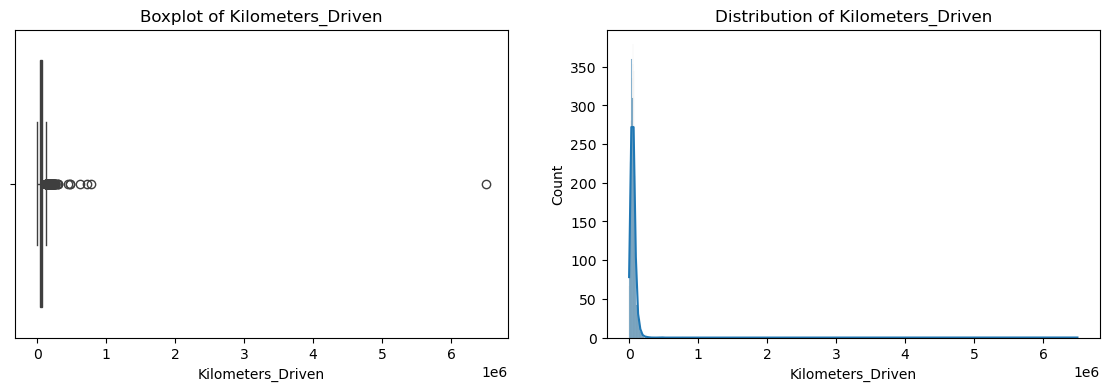

Num of outliers : 199
% of outliers : 3.388964577656676 %


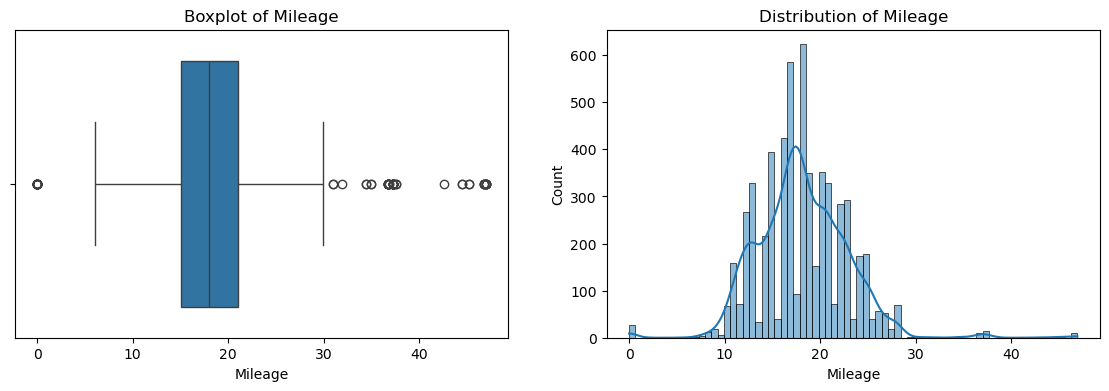

Num of outliers : 74
% of outliers : 1.2602179836512262 %


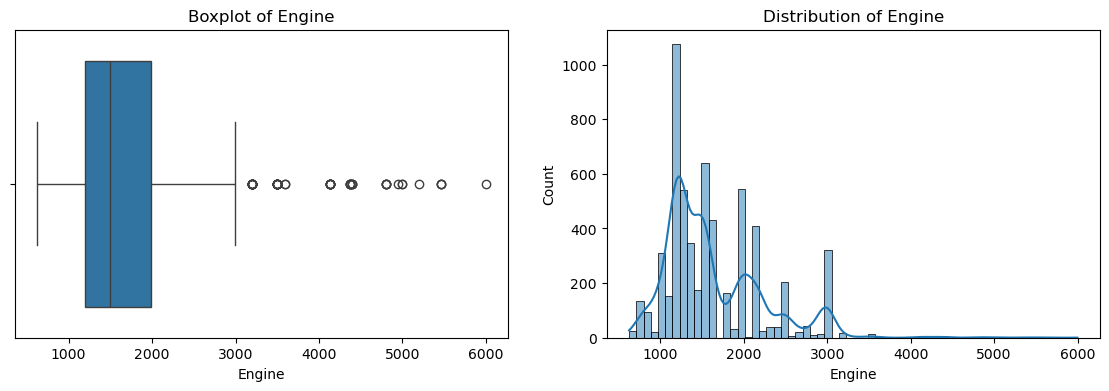

Num of outliers : 58
% of outliers : 0.9877384196185286 %


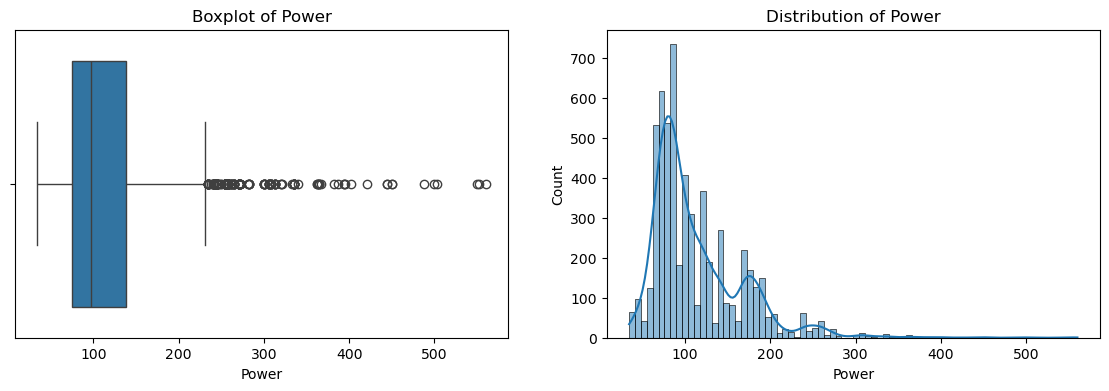

Num of outliers : 238
% of outliers : 4.053133514986376 %


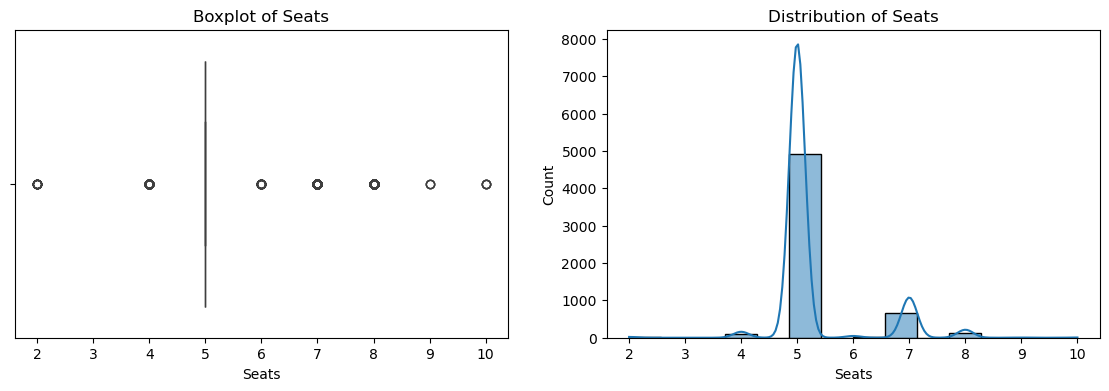

Num of outliers : 953
% of outliers : 16.229564032697546 %


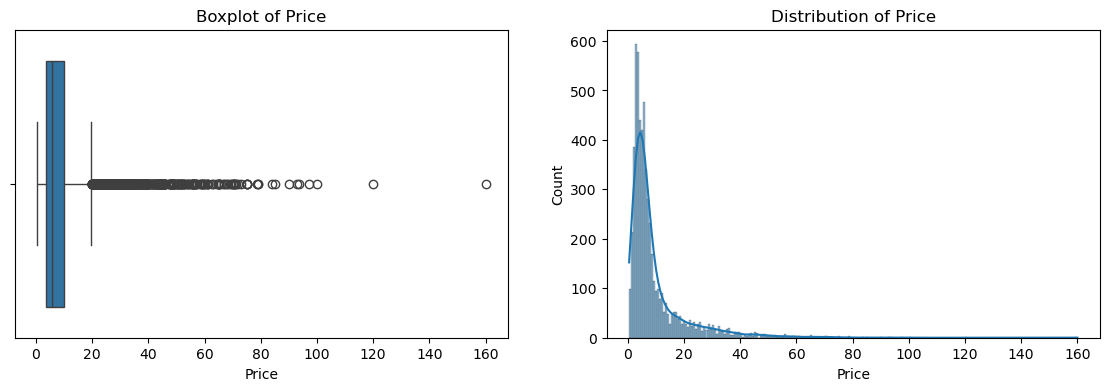

Num of outliers : 712
% of outliers : 12.125340599455042 %


In [20]:
# outliers 시각화
numeric_col = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numeric_col:
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    # 1열: 상자 그림(Boxplot)
    sns.boxplot(x=data[col], ax=axes[0])
    axes[0].set_title(f'Boxplot of {col}')

    # 2열: 데이터 분포를 나타내는 히스토그램
    sns.histplot(data[col], kde=True, ax=axes[1])
    axes[1].set_title(f'Distribution of {col}')

    plt.show()
    print('Num of outliers :', numeric_iqr (data, col) )
    print('% of outliers :', numeric_iqr (data, col) / len(data) * 100, '%')

In [72]:
data['Kilometers_Driven'].max()

6500000

➡️ Kilometers_Driven의 scale이 크고, max값이 다른 이상치, 값들과 차이가 가장 많이 나므로, max값만 제거

In [67]:
ind = data[data['Kilometers_Driven'] == data['Kilometers_Driven'].max()].index
data = data.drop(ind)

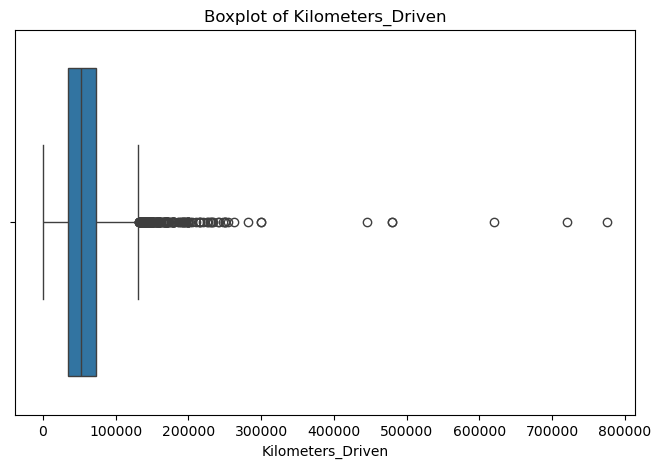

In [158]:
# 이상치를 제거한 후의 박스플롯 
plt.figure(figsize=(8, 5))

sns.boxplot(x=data['Kilometers_Driven'])
plt.title('Boxplot of Kilometers_Driven')
plt.show()


### 파생 변수
- 더미 변수 생성 시 Name 컬럼의 값이 많아서 제거하는 것으로 결정. 
- 대신 Name 컬럼에서 브랜드(제조사)를 추출하여 새로운 열 생성
- 1800여개의 unique value → 28개의 unique value

In [68]:
data['Brand']=data['Name'].str.split(" ").str[0]

In [69]:
data['Brand'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               261
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Brand, dtype: int64

ISUZU, Isuzu 가 구분되어 있음 → lower()

In [70]:
data['Brand']=data['Brand'].str.lower()

In [71]:
#datsun은 nissan의 산하 브랜드
data.loc[data['Brand']=='datsun', 'Brand'] = 'nissan'

In [26]:
data['Brand'].nunique()

28

In [42]:
# 브랜드별 평균 중고 가격
data.groupby('Brand')['Price'].mean()

Brand
ambassador         1.350000
audi              25.569787
bentley           59.000000
bmw               25.288046
chevrolet          3.057333
fiat               3.570435
force              9.333333
ford               6.957721
honda              5.424167
hyundai            5.513715
isuzu             14.696667
jaguar            37.632250
jeep              18.718667
lamborghini      120.000000
land              39.861053
mahindra           8.058955
maruti             4.554868
mercedes-benz     26.917848
mini              26.896923
mitsubishi        11.058889
nissan             4.563529
porsche           49.204375
renault            5.799034
skoda              7.586453
tata               3.605574
toyota            11.907970
volkswagen         5.306815
volvo             18.802857
Name: Price, dtype: float64

### 더미변수

In [72]:
# Name 컬럼 제거
data.drop("Name", axis = 1, inplace = True)

In [76]:
data = pd.get_dummies(data)

In [77]:
data.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price', 'Location_Ahmedabad', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Automatic', 'Transmission_Manual', 'Brand_ambassador',
       'Brand_audi', 'Brand_bentley', 'Brand_bmw', 'Brand_chevrolet',
       'Brand_fiat', 'Brand_force', 'Brand_ford', 'Brand_honda',
       'Brand_hyundai', 'Brand_isuzu', 'Brand_jaguar', 'Brand_jeep',
       'Brand_lamborghini', 'Brand_land', 'Brand_mahindra', 'Brand_maruti',
       'Brand_mercedes-benz', 'Brand_mini', 'Brand_mitsubishi', 'Brand_nissan',
       'Brand_porsche', 'Brand_renault', 'Brand_skoda', 'Brand_tata',
       'Brand_toyota', 'Brand_volkswagen', 'Brand_volvo'],
      dt

### train, test set 분리

In [143]:
x = data.drop('Price', axis = 1)
y = data['Price']

In [144]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### 상관관계

In [94]:
# 상관계수가 0.8 이상인 항목만 필터링 (단, 대각선의 값은 0으로 설정)
corr_matrix = data.corr()

high_corr = corr_matrix[abs(corr_matrix) >= 0.8]
np.fill_diagonal(high_corr.values, 0)

result = high_corr[high_corr != 0].stack().reset_index()
result.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(result)

               Variable 1              Variable 2  Correlation
0                  Engine                   Power     0.866174
1                   Power                  Engine     0.866174
2        Fuel_Type_Diesel        Fuel_Type_Petrol    -0.977944
3        Fuel_Type_Petrol        Fuel_Type_Diesel    -0.977944
4  Transmission_Automatic     Transmission_Manual    -1.000000
5     Transmission_Manual  Transmission_Automatic    -1.000000


In [145]:
x_train.drop(['Fuel_Type_Petrol', 'Transmission_Manual','Engine'], axis=1, inplace=True)

In [146]:
x_test.drop(['Fuel_Type_Petrol', 'Transmission_Manual','Engine'], axis=1, inplace=True)

### 정규화

In [147]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 회귀분석

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm 

In [100]:
X = sm.add_constant(x_train_scaled)
model = sm.OLS(y_train, X).fit()

In [101]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     349.2
Date:                Wed, 31 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:44:34   Log-Likelihood:                -14584.
No. Observations:                4696   AIC:                         2.926e+04
Df Residuals:                    4651   BIC:                         2.955e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.6185      0.079    121.434      0.0

In [158]:
# p-value가 0.05 이상인 변수 선택
high_pvalues = model.p_values[p_values >= 0.05]

# 해당 변수의 이름 출력
print(high_pvalues.index.tolist())

['x7', 'x13', 'x17', 'x20', 'x21', 'x27', 'x28', 'x32', 'x34', 'x41', 'x47', 'x49']


In [161]:
high_pvalue_columns = [x_train.columns.tolist()[int(index[1:])-1] for index in high_pvalues.index]
high_pvalue_columns

['Location_Ahmedabad',
 'Location_Jaipur',
 'Location_Pune',
 'Fuel_Type_LPG',
 'Transmission_Automatic',
 'Brand_fiat',
 'Brand_force',
 'Brand_isuzu',
 'Brand_jeep',
 'Brand_mitsubishi',
 'Brand_toyota',
 'Brand_volvo']

- Coefficient : 설명변수가 종속변수에 미치는 영향. 절댓값이 클수록 중요도가 높다
- t-statistic : 절댓값이 클수록 중요도가 높은 변수일 가능성이 있다
- p-value : 계수가 통계적으로 유의미한지 여부를 판단하는 기준으로, p-value < 0.05 이면 해당 변수가 모델에 중요하다고 간주 <br>
    ➡️ high_pvalue_columns 변수들을 제외한 나머지 변수들의 중요도가 유의미하다고 간주할 수 있다
- Standard Error : 계수의 추정치의 변동성

In [148]:
ones = np.ones((x_test_scaled.shape[0], 1))
x_test_scaled_new = np.hstack((ones, x_test_scaled))

In [149]:
x_test_scaled_new.shape

(1175, 50)

In [150]:
# 예측
y_pred = model.predict(x_test_scaled_new)

In [163]:
# r2 score
r2 = r2_score(y_test, y_pred)
# mse
mse = mean_squared_error(y_test, y_pred)

print(f'r2_score: {r2}')
print(f'mse: {mse}')

r2_score: 0.7743660460565394
mse: 31.92370938295767


In [154]:
residuals = model.resid

### 회귀진단

#### 1) 선형성 
설명변수 x와 y의 관계가 선형이다

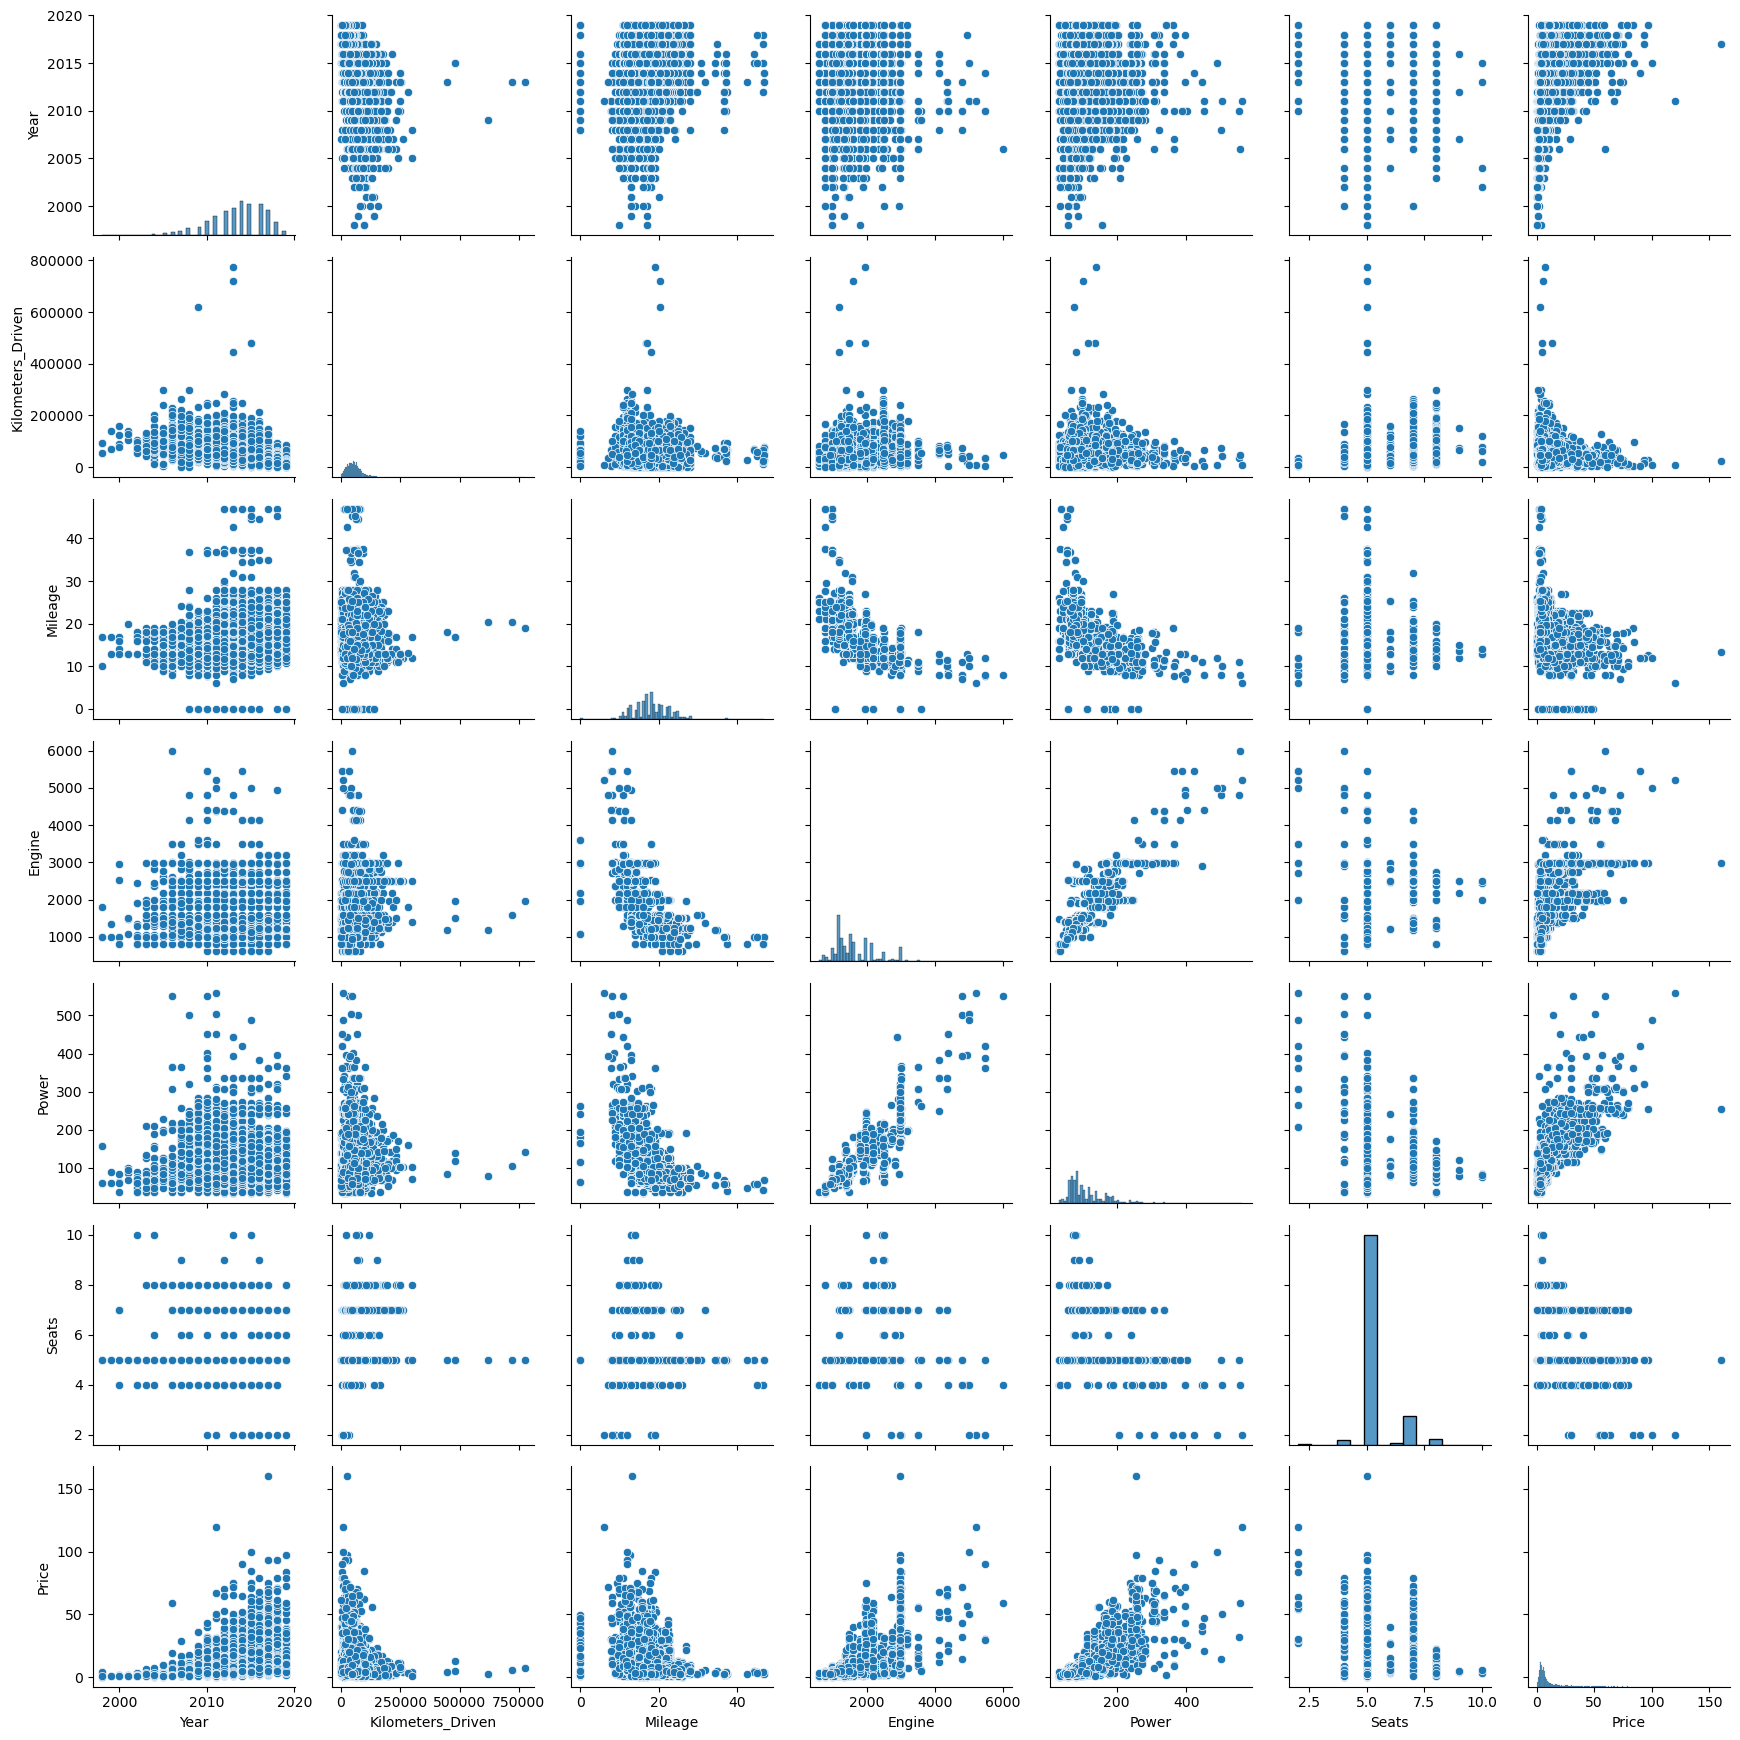

In [79]:
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
sns.pairplot(data[numeric_cols],height=2.5)
plt.tight_layout()
plt.show()

➡️ 시각화 결과에 의하면, `Year` 변수와 `Power` 변수가 종속변수 Price와 어느 정도 선형성을 보인다

#### 2) 정규성
잔차는 평균 0인 분포를 따른다 
- shapiro-wilk test
    - 귀무가설 H0 = 잔차는 정규 분포를 따른다
    - 대립가설 H1 = 정규 분포를 따르지 않는다
    

In [155]:
from scipy import stats

print("Shapiro-Wilk test:", stats.shapiro(residuals))

Shapiro-Wilk test: ShapiroResult(statistic=0.7237398624420166, pvalue=0.0)


➡️ 잔차는 정규 분포를 따르지 않는 것으로 해석된다

#### 3) 독립성
잔차는 서로 독립이다. 
- durbin-watson test
    - 귀무가설 H0 = 잔차는 독립이다
    - 대립가설 H1 = 잔차는 자기상관성을 가진다

In [156]:
from statsmodels.stats.stattools import durbin_watson

print("Durbin-Watson statistic:", durbin_watson(residuals))

Durbin-Watson statistic: 1.9892658268934353


➡️ Durbin-Watson 통계량이 2에 가까운 값으로 자기상관성이 없다.

#### 4) 등분산성
잔차의 분산은 일정하다
- breusch-pagan test
    - 귀무가설 H0 = 잔차의 모든 분산은 일정하다
    - 대립가설 H1 = 잔차의 모든 분산은 일정하지 않다

In [157]:
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.compat import lzip

bp_test = het_breuschpagan(residuals, model.model.exog)
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(lzip(names, bp_test))

[('Lagrange multiplier statistic', 620.1777408440008), ('p-value', 6.513361200074775e-100), ('f-value', 16.08401986854964), ('f p-value', 3.518821750817378e-111)]


➡️ 잔차들이 등분산성을 가지지 않는다 = 이분산성